In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')


In [3]:
df.shape


(1000, 8)

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isna().sum()


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.nunique()


gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:

print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [9]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [10]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [11]:

reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [12]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


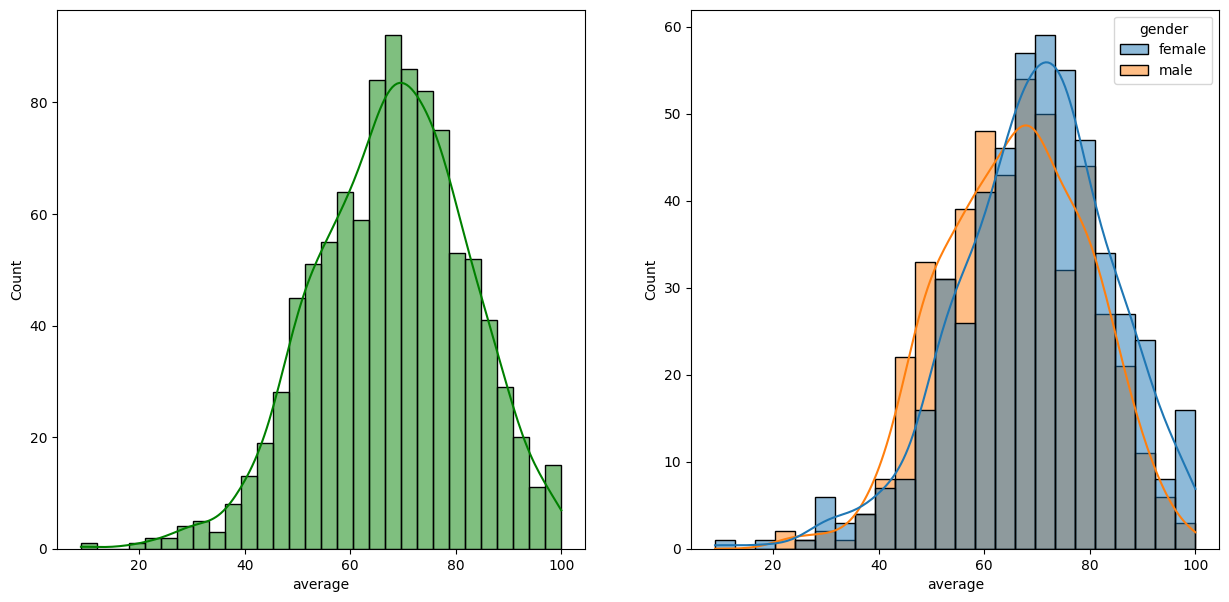

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

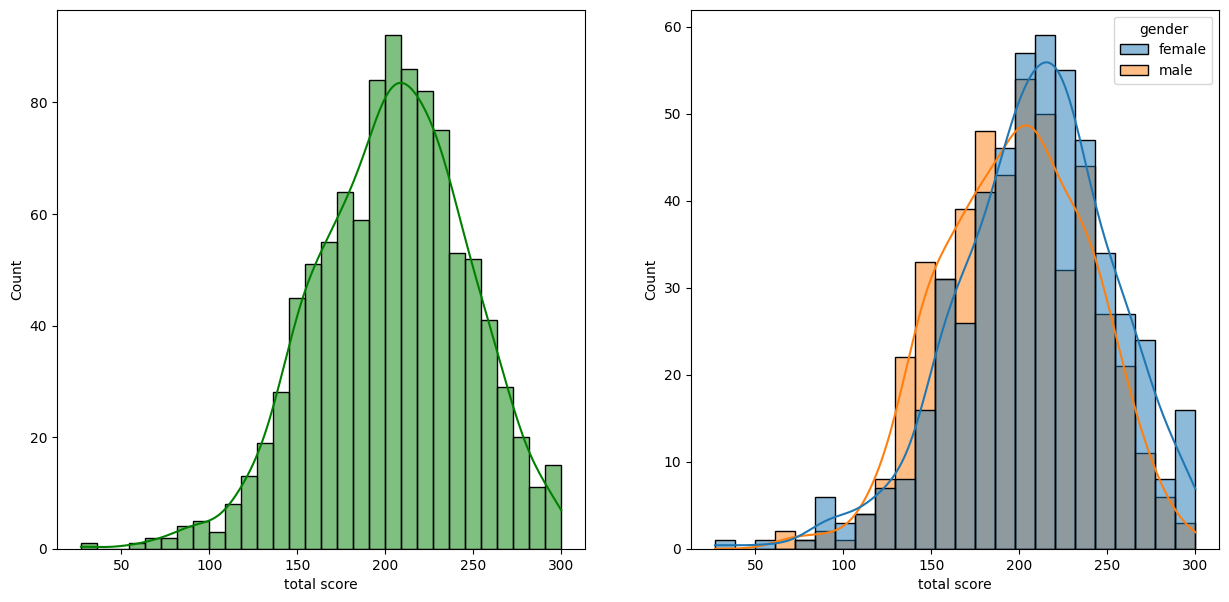

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

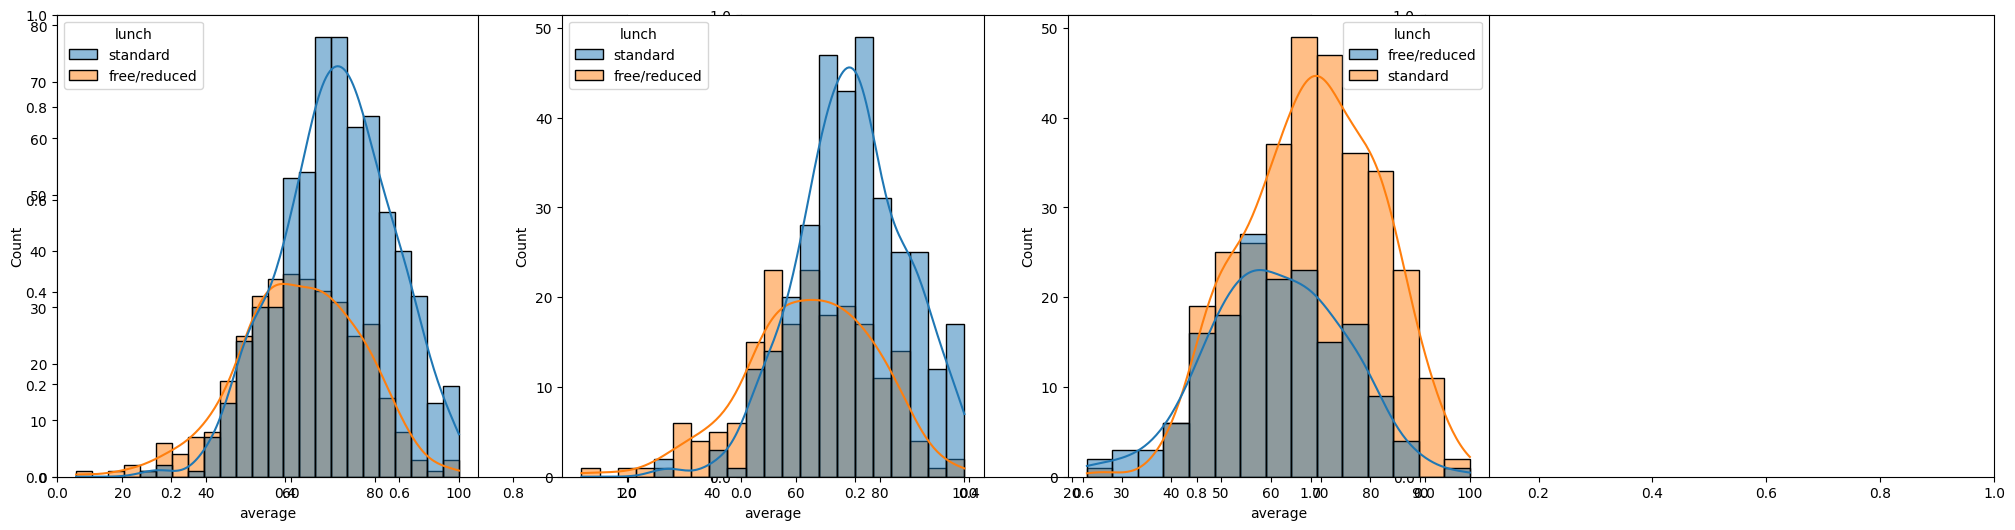

In [15]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

ValueError: Could not interpret value `parental level of education` for `hue`. An entry with this name does not appear in `data`.

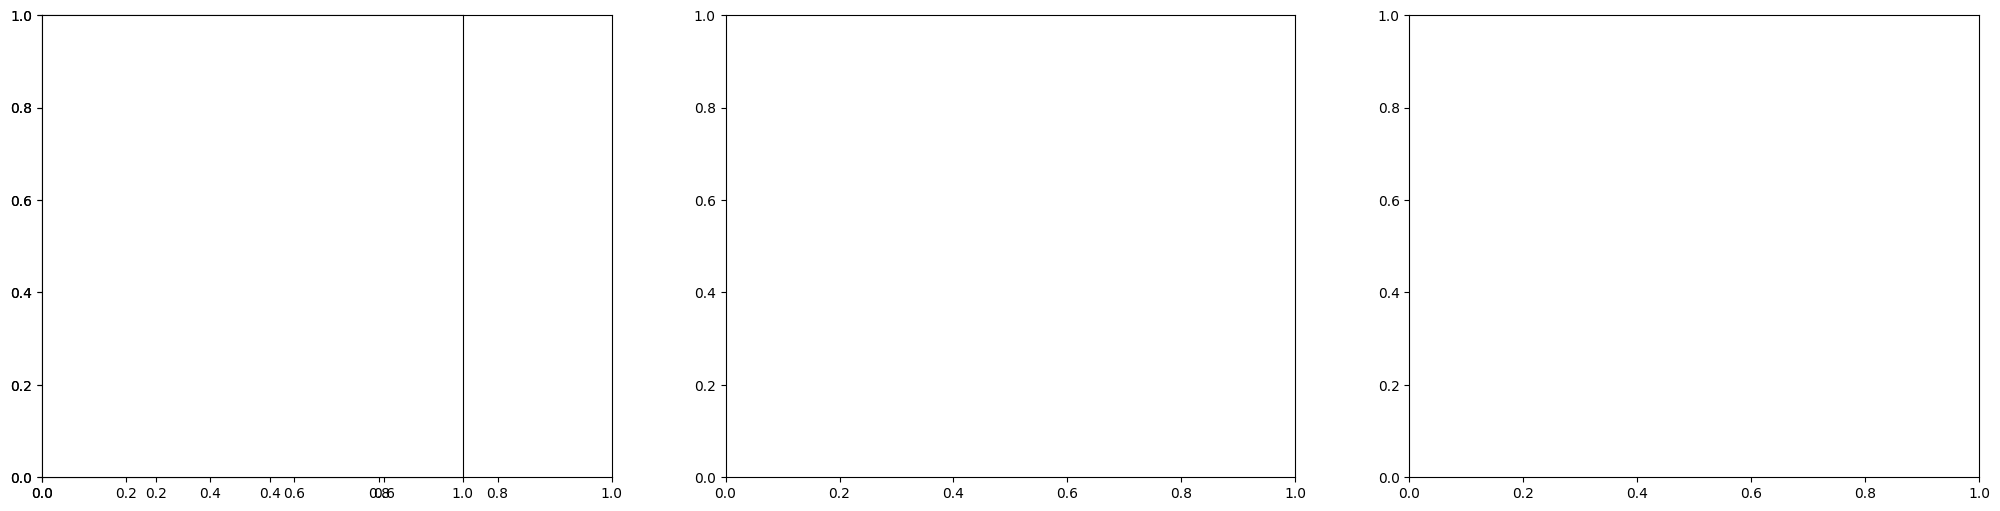

In [16]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')


ValueError: Could not interpret value `parental level of education` for `hue`. An entry with this name does not appear in `data`.

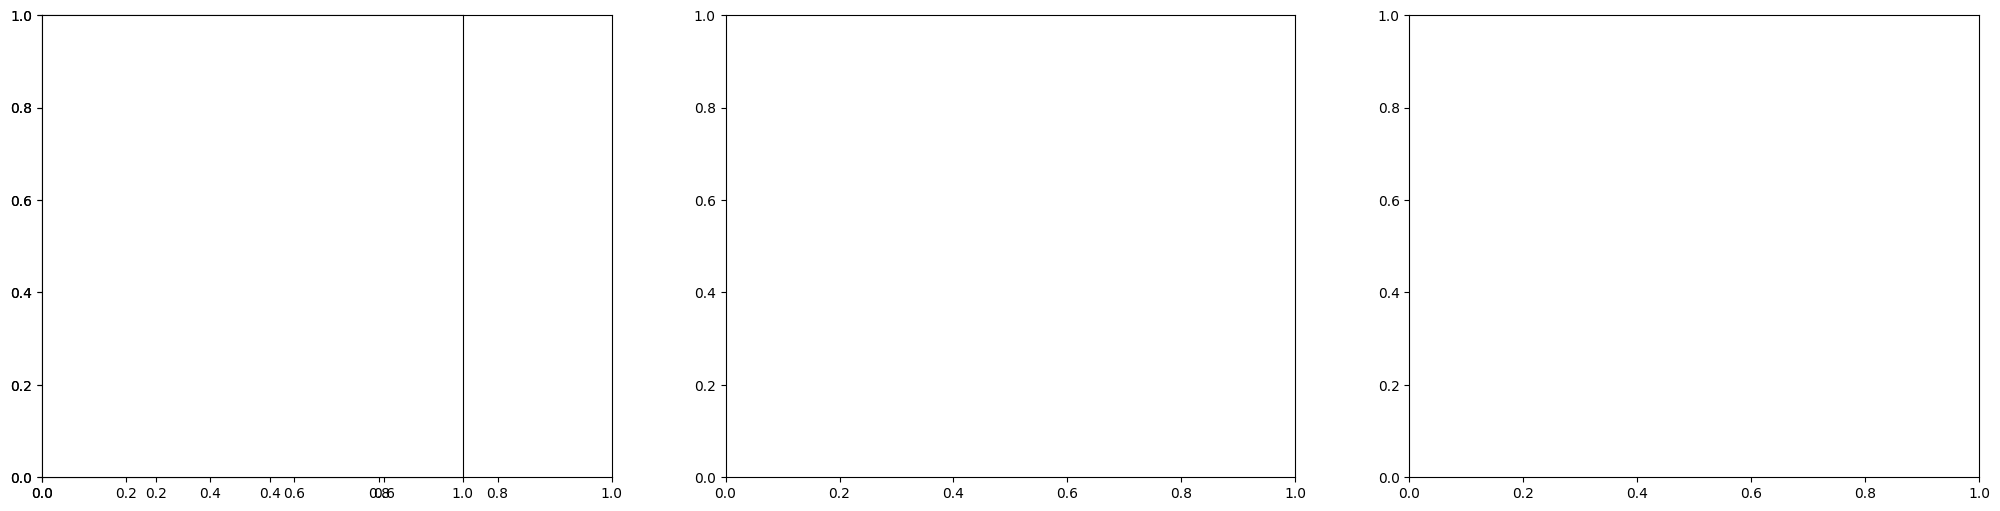

In [17]:
# Check the column names to ensure no typo or extra spaces
print(df.columns)

# Strip spaces if needed
df.columns = df.columns.str.strip()

# Create plots
plt.subplots(1, 3, figsize=(25, 6))

# First subplot
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental level of education')

# Second subplot - Filtered data for 'male'
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental level of education')

# Third subplot - Filtered data for 'female'
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education')

plt.tight_layout()
plt.show()


ValueError: Could not interpret value `math score` for `y`. An entry with this name does not appear in `data`.

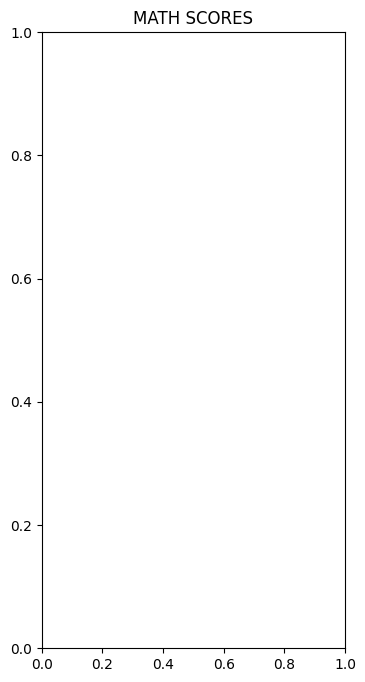

In [18]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

KeyError: 'race/ethnicity'

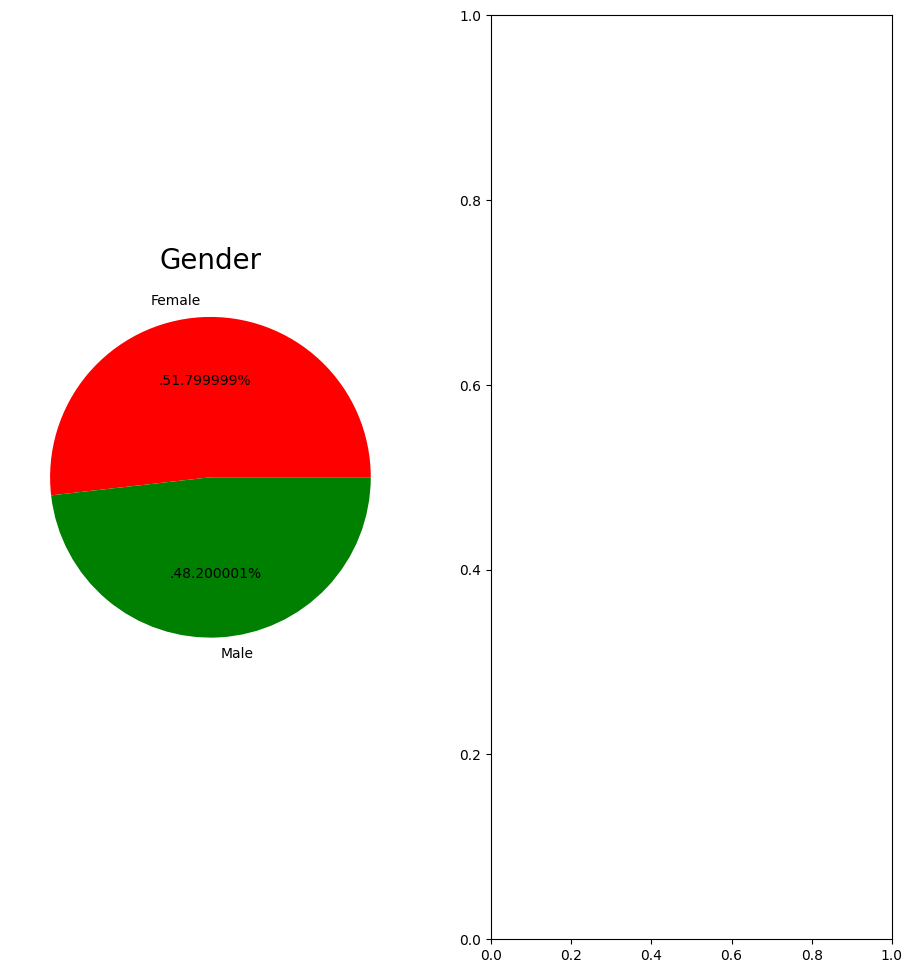

In [19]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

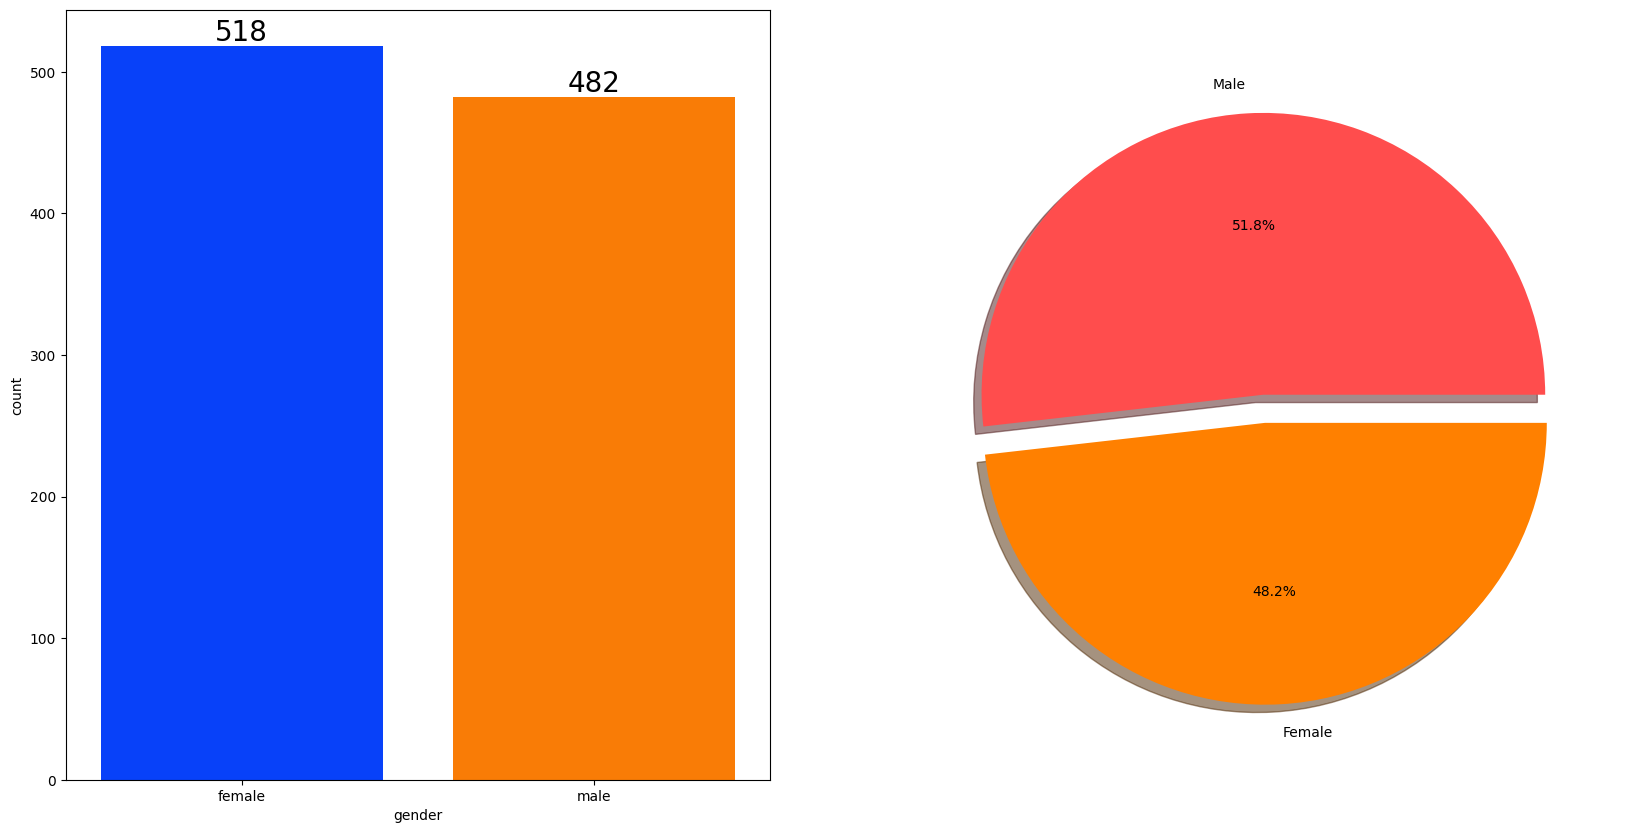

In [20]:

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [22]:
# First, check the data types of each column
print(df.dtypes)

# Select only the numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Perform the groupby operation only on the numeric columns
gender_group = df.groupby('gender')[numeric_columns.columns].mean()

# Display the result
print(gender_group)


gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
total score                      int64
average                        float64
dtype: object
        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


In [23]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

KeyError: 'math score'

<Figure size 1000x800 with 0 Axes>

In [24]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Check the columns in gender_group to make sure 'average' and 'math score' exist
print(gender_group.columns)

# Make sure 'average' and 'math score' columns are present in gender_group
if 'average' in gender_group.columns and 'math score' in gender_group.columns:
    plt.figure(figsize=(10, 8))

    # X-axis labels
    X = ['Total Average', 'Math Average']

    # Accessing the correct gender scores from gender_group
    female_scores = [gender_group['average'][1], gender_group['math score'][1]]  # Assuming index 1 is for females
    male_scores = [gender_group['average'][0], gender_group['math score'][0]]  # Assuming index 0 is for males

    # X-axis positions for the bars
    X_axis = np.arange(len(X))

    # Plotting the bar chart
    plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
    plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

    # Adding labels and title
    plt.xticks(X_axis, X)
    plt.ylabel("Marks")
    plt.title("Total average vs Math average marks of both the genders", fontweight='bold')
    plt.legend()

    # Show the plot
    plt.show()
else:
    print("Columns 'average' and 'math score' are not found in gender_group.")


Index(['math_score', 'reading_score', 'writing_score', 'total score',
       'average'],
      dtype='object')
Columns 'average' and 'math score' are not found in gender_group.


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')


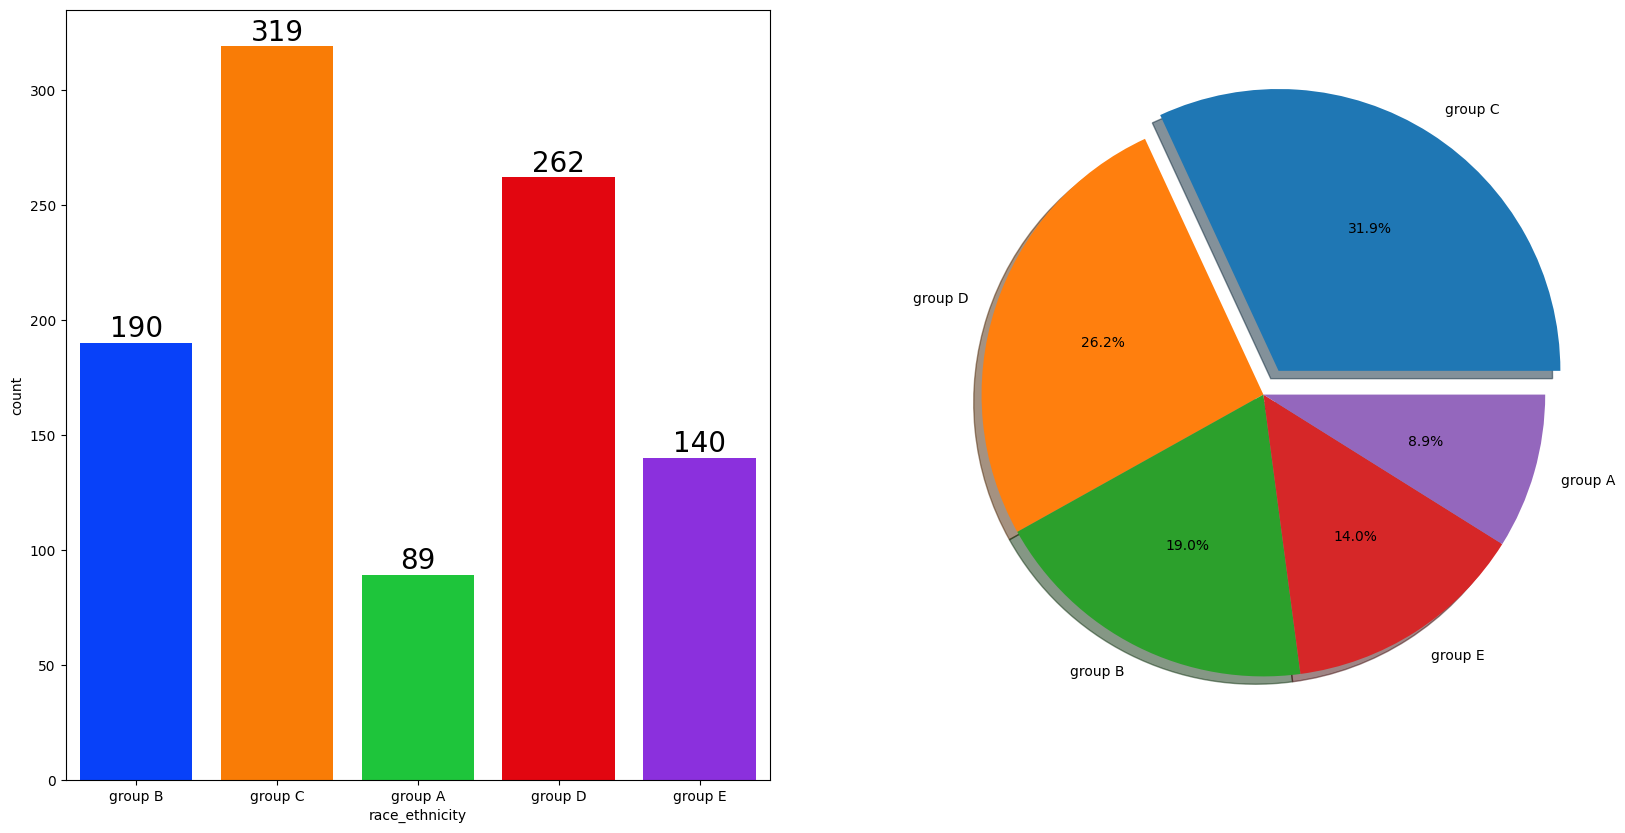

In [27]:
# First, let's check the column names to ensure we're using the correct one
print(df.columns)

# Strip any extra spaces in the column names
df.columns = df.columns.str.strip()

# Now, plotting with the correct column name
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Correct column name for 'race/ethnicity' after stripping spaces
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)

# Adding bar labels for the countplot
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart for 'race_ethnicity' distribution
plt.pie(x=df['race_ethnicity'].value_counts(), 
        labels=df['race_ethnicity'].value_counts().index, 
        explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)

plt.show()


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')


KeyError: 'Column not found: math score'

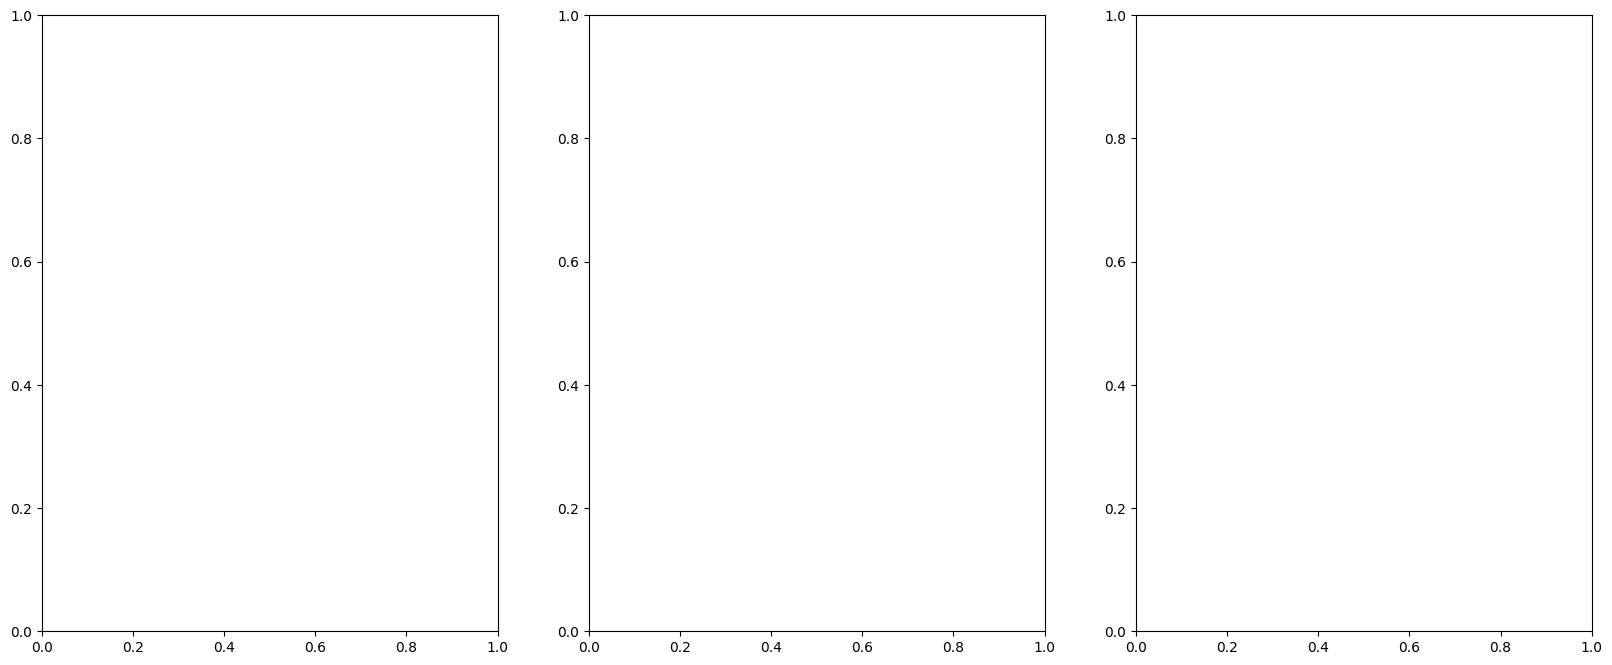

In [30]:
# First, check the column names to make sure the column 'race/ethnicity' exists
print(df.columns)

# Strip spaces if any in column names
df.columns = df.columns.str.strip()

# Now group the data by 'race/ethnicity' if the column name is correct
Group_data2 = df.groupby('race_ethnicity')  # Use the correct column name, e.g., 'race_ethnicity'

# Create subplots
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot Math Score
sns.barplot(x=Group_data2['math score'].mean().index, 
            y=Group_data2['math score'].mean().values, 
            palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plot Reading Score
sns.barplot(x=Group_data2['reading score'].mean().index, 
            y=Group_data2['reading score'].mean().values, 
            palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Plot Writing Score
sns.barplot(x=Group_data2['writing score'].mean().index, 
            y=Group_data2['writing score'].mean().values, 
            palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.show()


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')


KeyError: 'Column not found: math score'

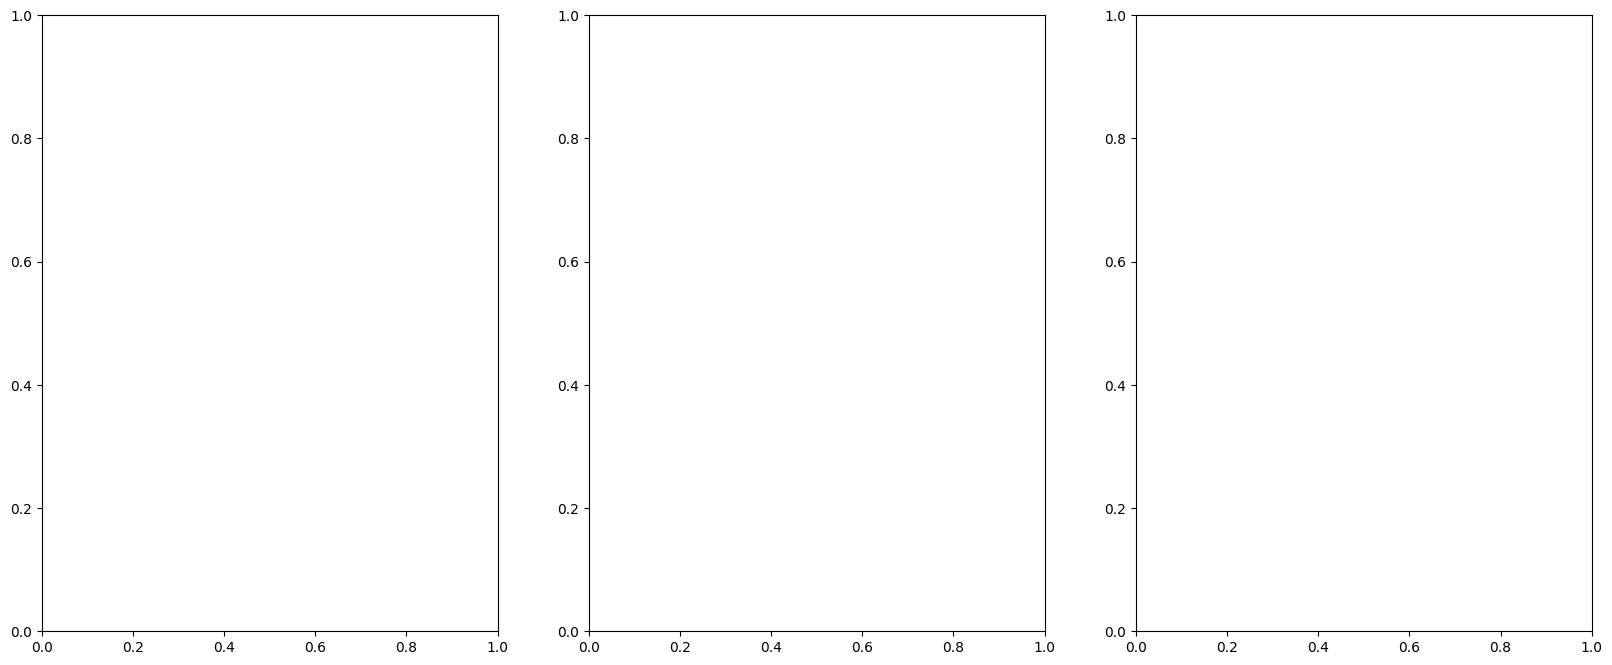

In [31]:
# First, check the column names to ensure there are no typos
print(df.columns)

# Clean column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Now, try to group and plot
Group_data2 = df.groupby('race_ethnicity')

f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot Math Score
sns.barplot(x=Group_data2['math score'].mean().index, 
            y=Group_data2['math score'].mean().values, 
            palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plot Reading Score
sns.barplot(x=Group_data2['reading score'].mean().index, 
            y=Group_data2['reading score'].mean().values, 
            palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Plot Writing Score
sns.barplot(x=Group_data2['writing score'].mean().index, 
            y=Group_data2['writing score'].mean().values, 
            palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.show()


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')


KeyError: 'Column not found: math score'

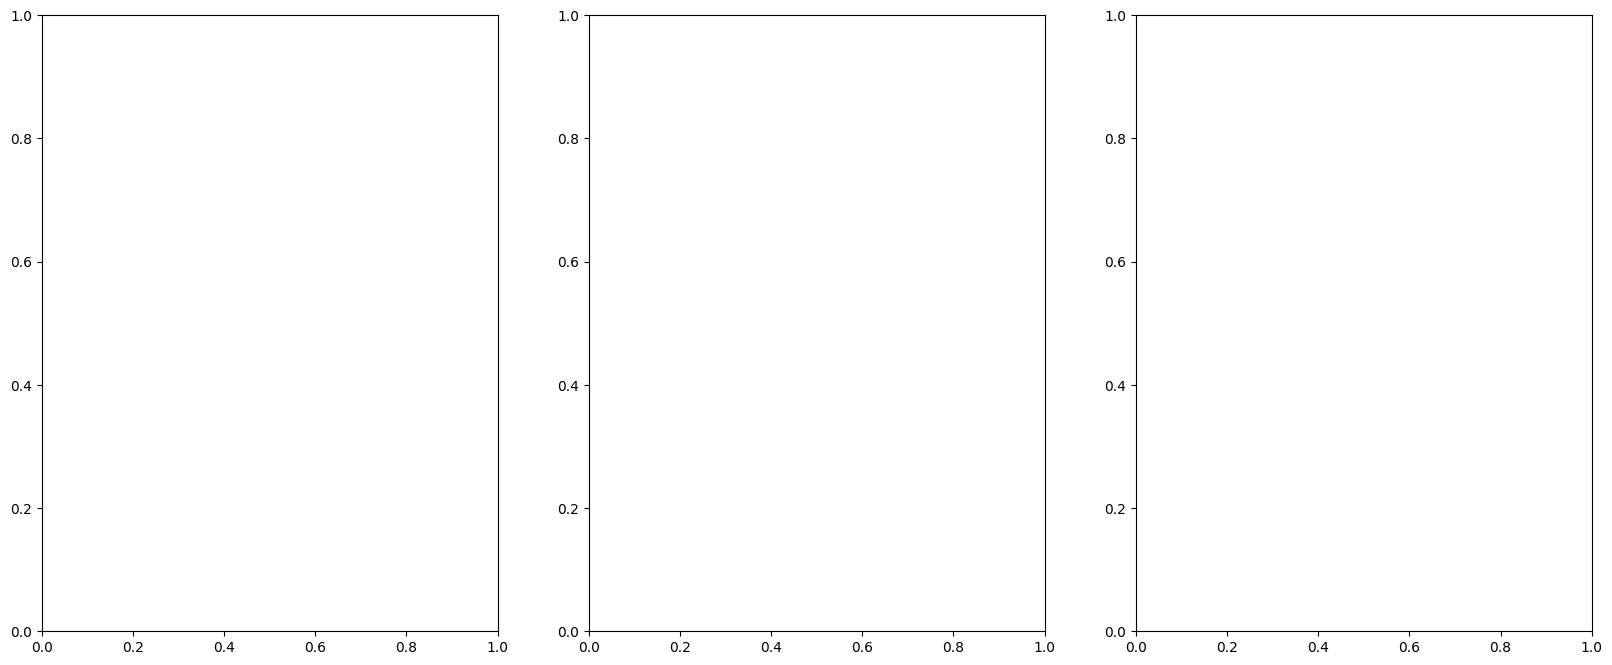

In [32]:
# Clean column names by stripping extra spaces or unwanted characters
df.columns = df.columns.str.strip()

# Double-check column names
print(df.columns)

# Group by 'race_ethnicity' and plot
Group_data2 = df.groupby('race_ethnicity')

f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot Math Score (make sure 'math score' is the exact name)
sns.barplot(x=Group_data2['math score'].mean().index, 
            y=Group_data2['math score'].mean().values, 
            palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plot Reading Score
sns.barplot(x=Group_data2['reading score'].mean().index, 
            y=Group_data2['reading score'].mean().values, 
            palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Plot Writing Score
sns.barplot(x=Group_data2['writing score'].mean().index, 
            y=Group_data2['writing score'].mean().values, 
            palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.show()


In [34]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

KeyError: 'race/ethnicity'

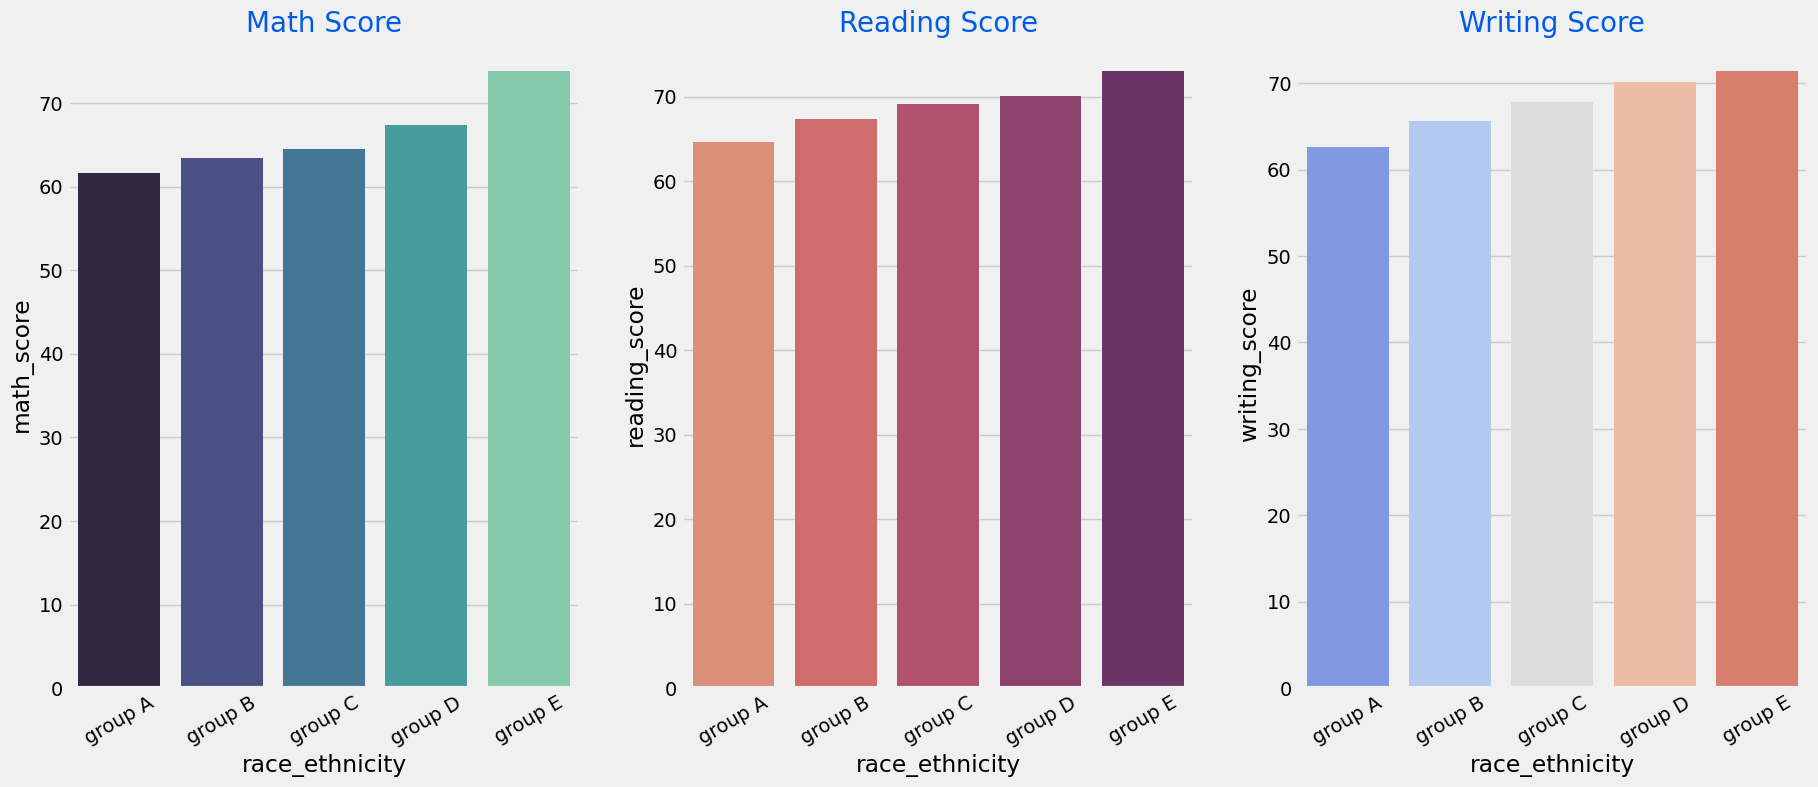

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_columns = ['math_score', 'reading_score', 'writing_score']
Group_data2 = df.groupby('race_ethnicity')[numeric_columns].mean()

# Create subplots
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot Math Score
sns.barplot(x=Group_data2.index, y=Group_data2['math_score'], palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30)

# Plot Reading Score
sns.barplot(x=Group_data2.index, y=Group_data2['reading_score'], palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30)

# Plot Writing Score
sns.barplot(x=Group_data2.index, y=Group_data2['writing_score'], palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=30)

plt.show()


In [38]:

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

KeyError: 'parental level of education'

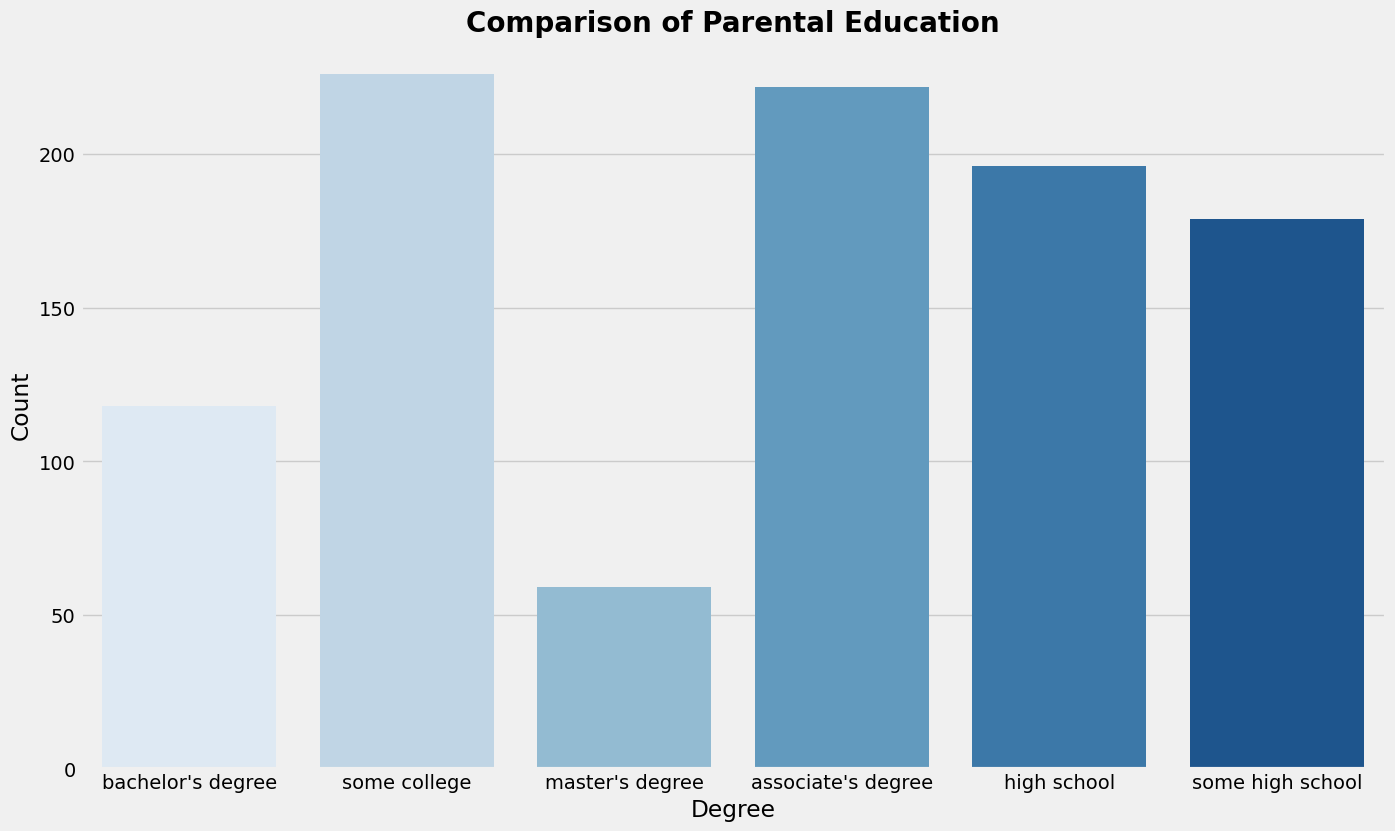

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Corrected sns.countplot syntax
sns.countplot(x='parental_level_of_education', data=df, palette='Blues')

# Titles and labels
plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')

# Display plot
plt.show()


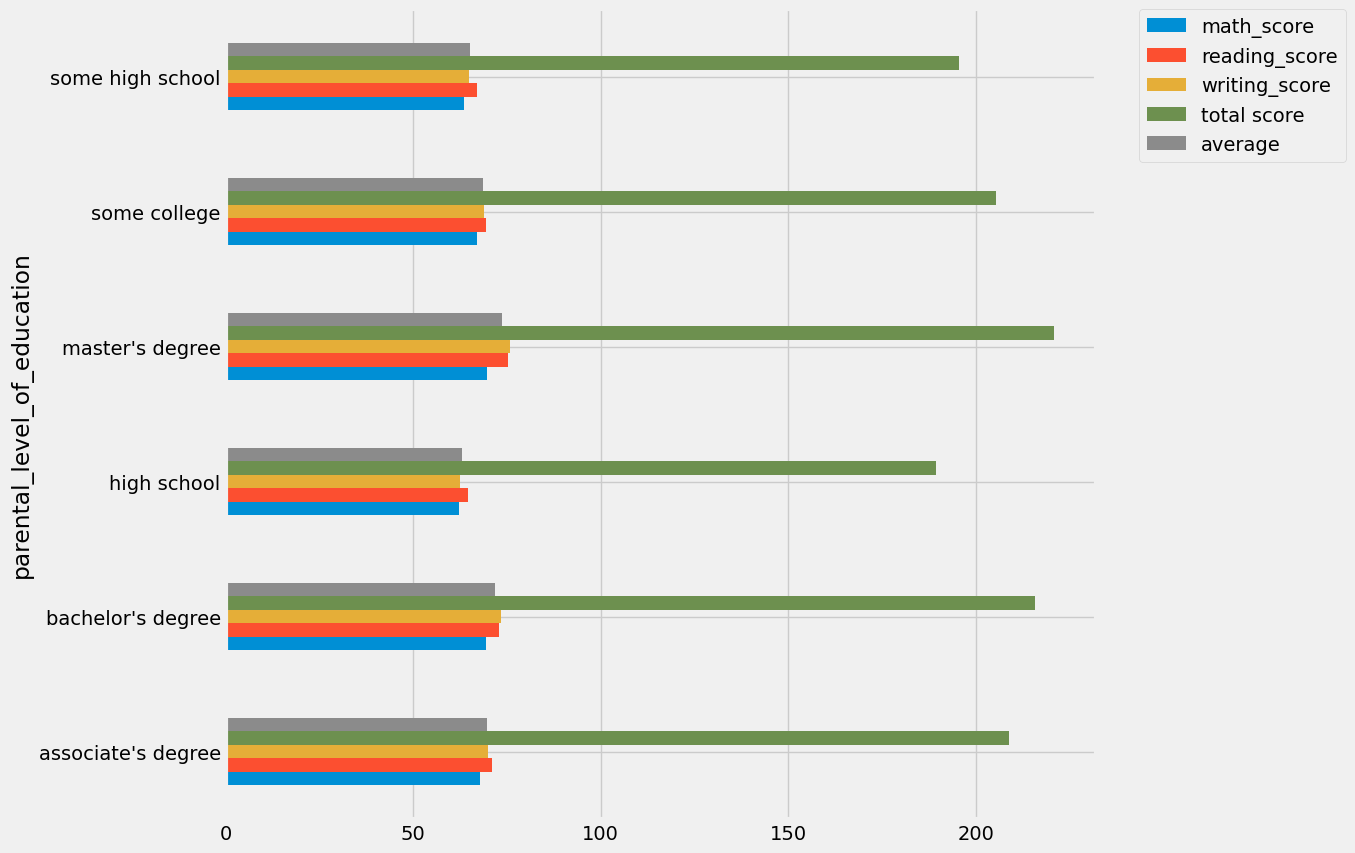

In [41]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'total score', 'average']

# Group by parental education and compute mean for numeric columns
df.groupby('parental_level_of_education')[numeric_columns].mean().plot(kind='barh', figsize=(10, 10))

# Adjust legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

# Corrected countplot syntax
sns.countplot(x='lunch', data=df, palette='PuBu')

# Titles and labels
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

# Show plot
plt.show()


OSError: 'seaborn-talk' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check available styles
print(plt.style.available)  # See valid styles

# Set a valid style
plt.style.use('seaborn-darkgrid')  # Alternative: 'seaborn-poster', 'seaborn-ticks'

# Set figure size
plt.rcParams['figure.figsize'] = (15, 9)

# Corrected countplot syntax
sns.countplot(x='lunch', data=df, palette='PuBu')

# Titles and labels
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

# Show plot
plt.show()


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [44]:
import matplotlib.pyplot as plt

print(plt.style.available)  # Check the list of valid styles


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


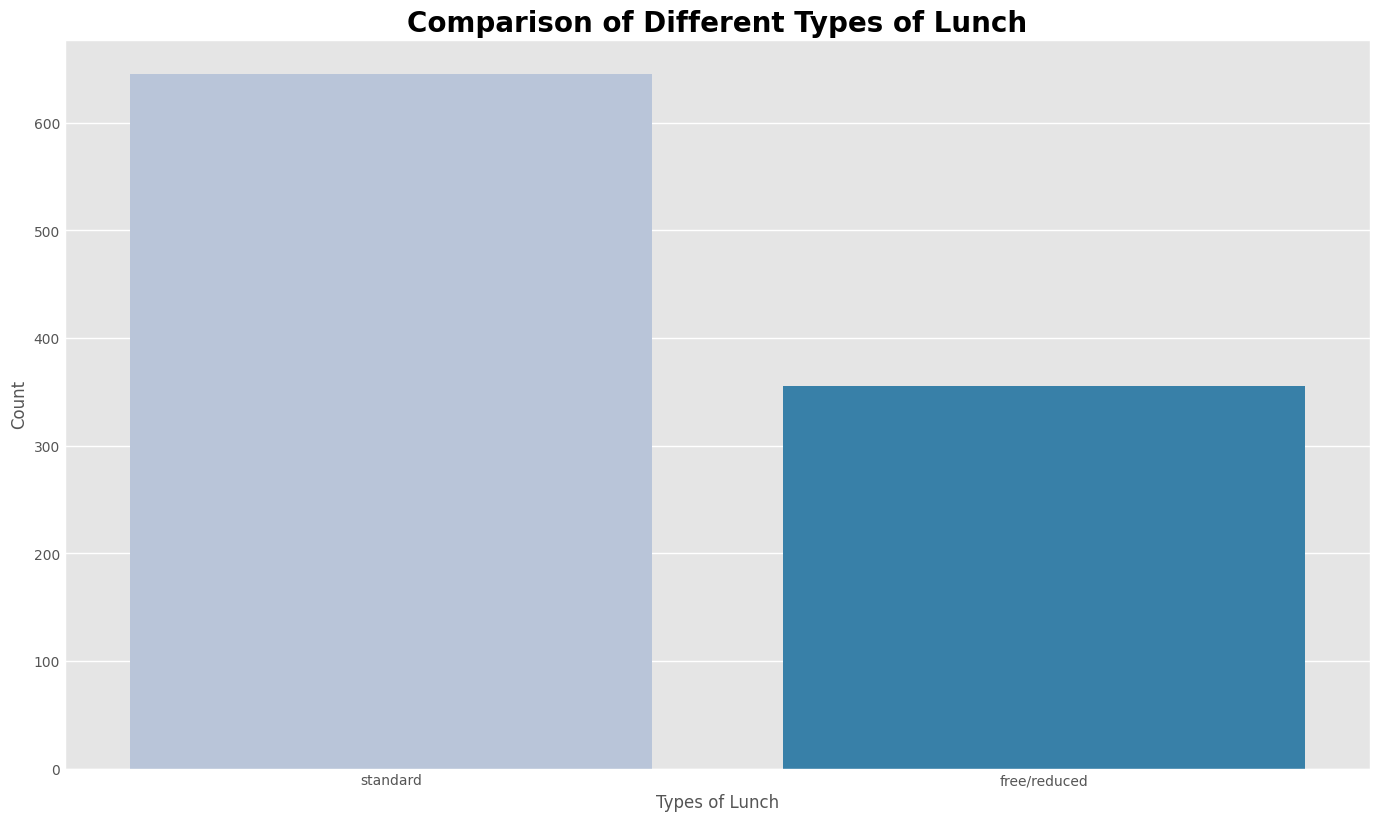

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print available styles
print(plt.style.available)

# Use a valid style from the printed list
plt.style.use('ggplot')  # Change to any valid style

# Set figure size
plt.rcParams['figure.figsize'] = (15, 9)

# Create the count plot
sns.countplot(x='lunch', data=df, palette='PuBu')

# Titles and labels
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

# Show plot
plt.show()


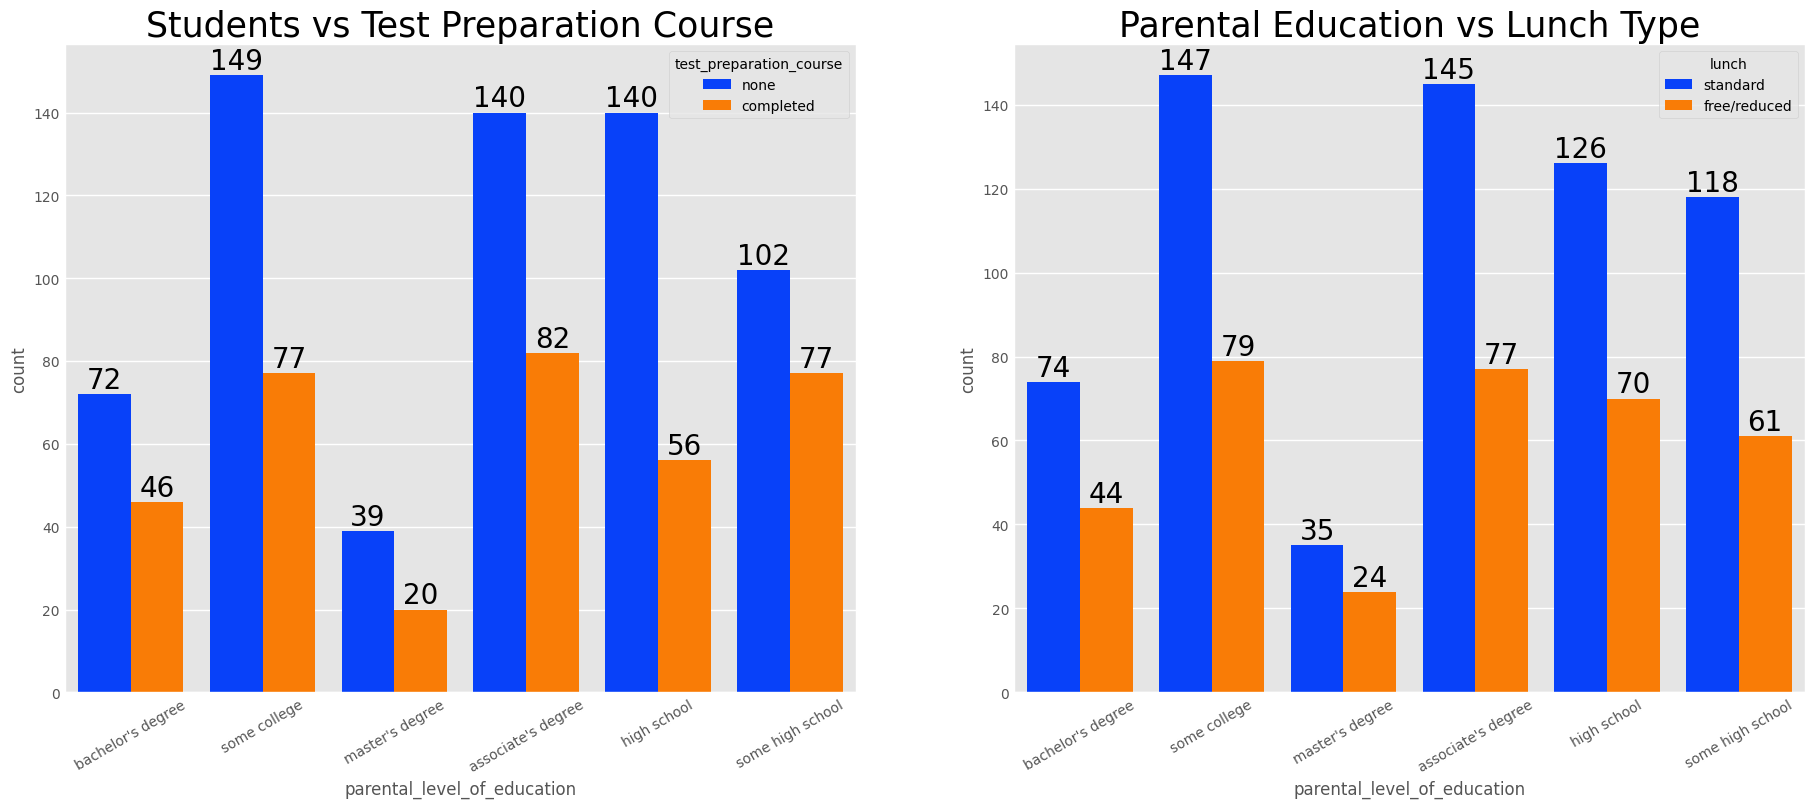

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# First Countplot: Test Preparation Course
sns.countplot(x='parental_level_of_education', data=df, palette='bright', hue='test_preparation_course', 
              saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)

# Add bar labels
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Second Countplot: Lunch Type
sns.countplot(x='parental_level_of_education', data=df, palette='bright', hue='lunch', 
              saturation=0.95, ax=ax[1])
ax[1].set_title('Parental Education vs Lunch Type', color='black', size=25)

# Add bar labels
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

# Rotate x-axis labels for better readability
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), rotation=30)

plt.show()


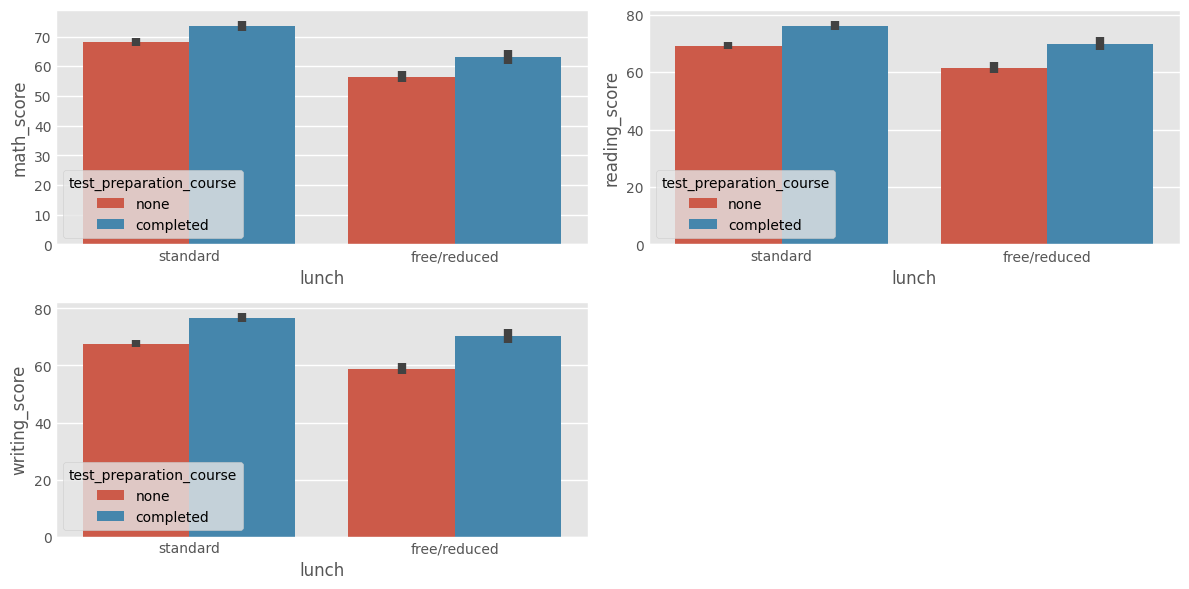

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df)

plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df)

plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df)

plt.tight_layout()
plt.show()


KeyError: 'math score'

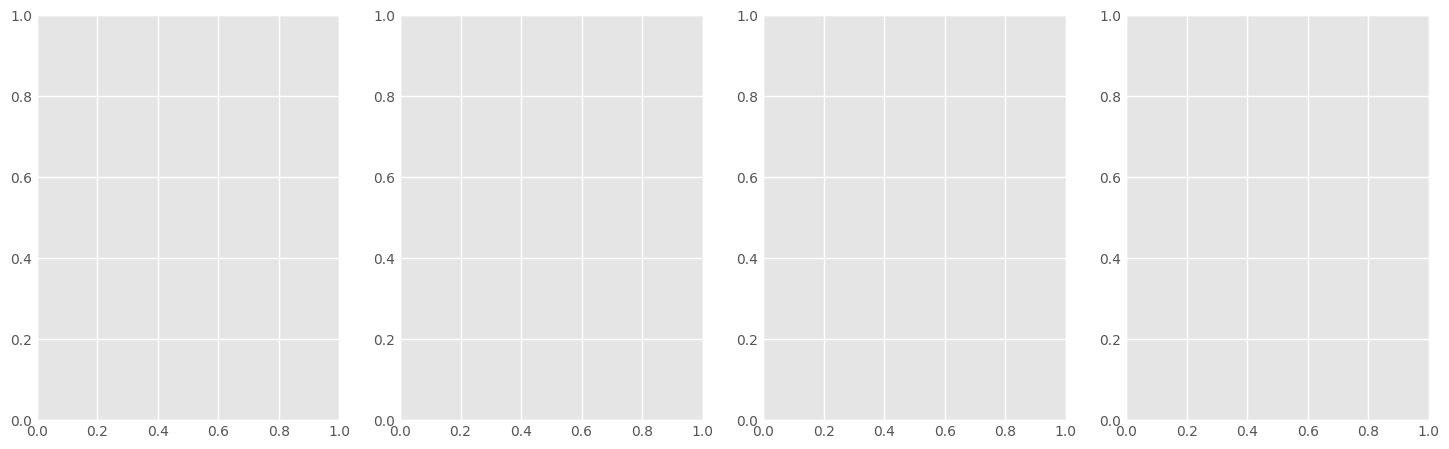

In [48]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

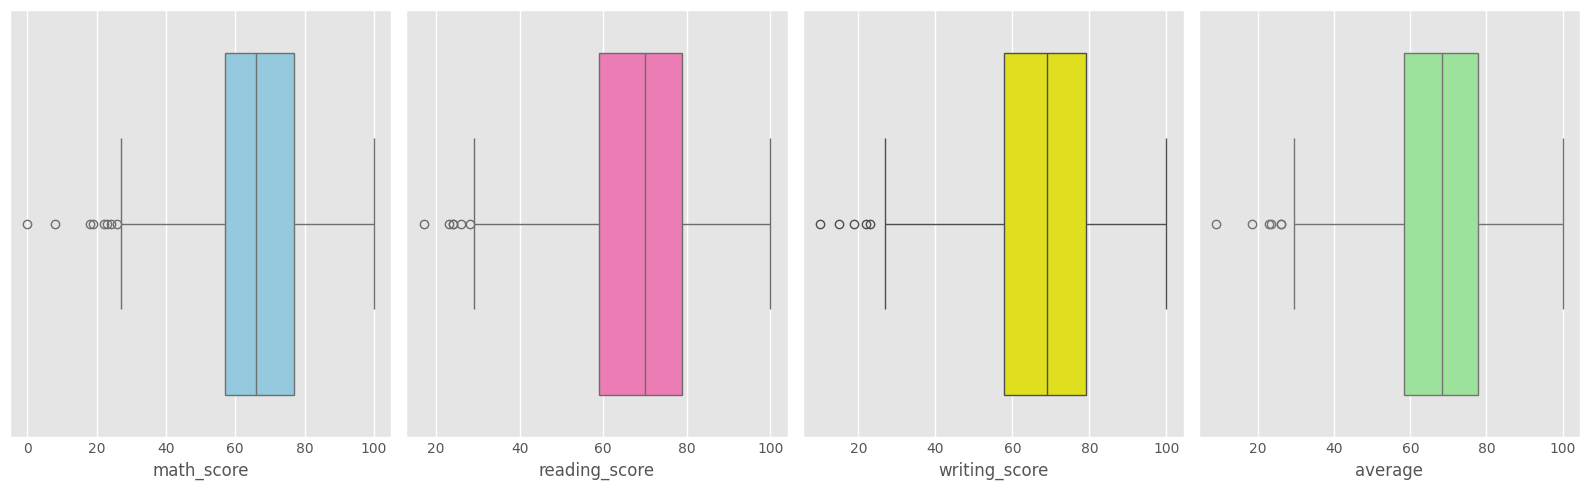

In [49]:
plt.subplots(1, 4, figsize=(16, 5))

plt.subplot(141)
sns.boxplot(x=df['math_score'], color='skyblue')

plt.subplot(142)
sns.boxplot(x=df['reading_score'], color='hotpink')

plt.subplot(143)
sns.boxplot(x=df['writing_score'], color='yellow')

plt.subplot(144)
sns.boxplot(x=df['average'], color='lightgreen')

plt.tight_layout()
plt.show()



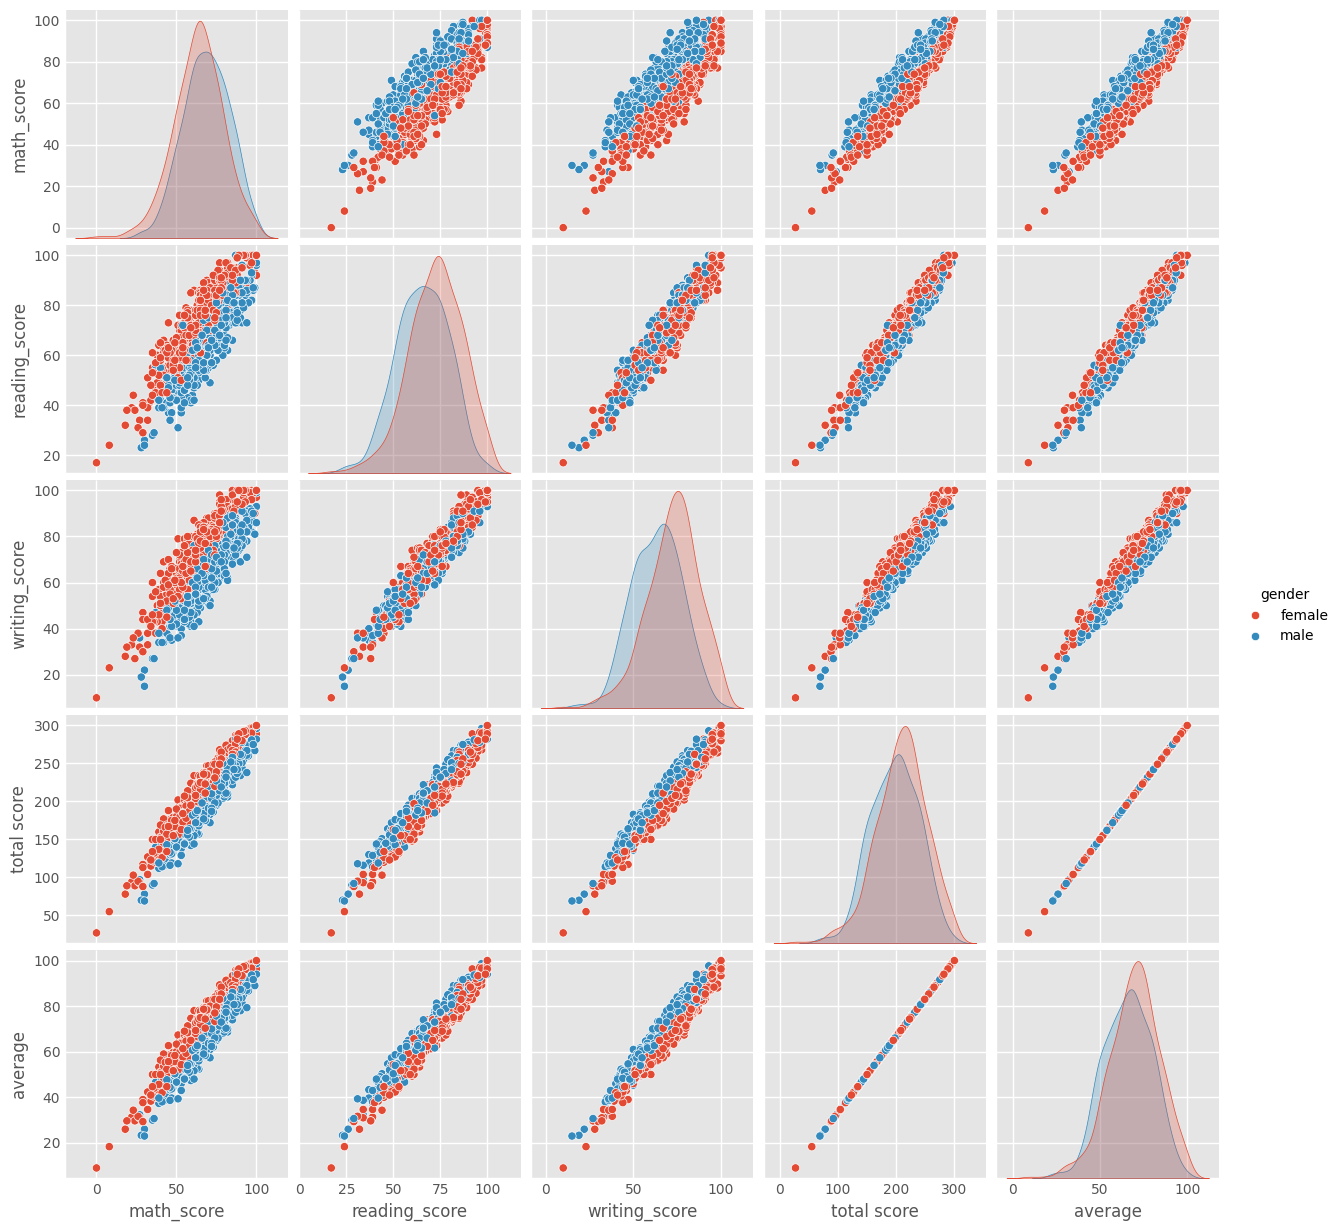

In [50]:
sns.pairplot(df,hue = 'gender')
plt.show()


In [51]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [55]:

reading_full = df[df['reading_score'] == 100[]].count()
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Reading: gender                         17
race_ethnicity                 17
parental_level_of_education    17
lunch                          17
test_preparation_course        17
math_score                     17
reading_score                  17
writing_score                  17
total score                    17
average                        17
dtype: int64
